In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read File

In [2]:
data = pd.read_csv(r"C:\Users\ndlov\Desktop\Projects\housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Identify Null Values


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Missing values identified in the total_bedrooms column --- 20433

#### Remove rows and columns with missing values

In [5]:
data.dropna() # returns dataframe with only non-null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True) # saves the result in the data object 

In [7]:
# Check if there is the same number of non-null vales in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data into training and testing datasets

In [8]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1) # dataframe without the target variable
y = data['median_house_value']

In [9]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 20% is the test data

#### Join the x and y training data 

In [12]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1018,-121.79,37.67,26.0,2163.0,339.0,947.0,346.0,6.0797,INLAND,211000.0
3345,-121.11,41.07,26.0,1707.0,308.0,761.0,250.0,2.7188,INLAND,48100.0
19112,-122.63,38.22,34.0,878.0,160.0,372.0,167.0,4.0417,<1H OCEAN,232100.0
14827,-117.09,32.66,37.0,1232.0,330.0,1086.0,330.0,1.6389,NEAR OCEAN,114300.0
18902,-122.26,38.11,52.0,2573.0,639.0,1238.0,529.0,2.6708,NEAR BAY,109700.0
...,...,...,...,...,...,...,...,...,...,...
3963,-118.57,34.20,18.0,7157.0,1869.0,4642.0,1699.0,3.1818,<1H OCEAN,208000.0
7390,-118.24,33.96,34.0,1724.0,432.0,1876.0,416.0,2.1078,<1H OCEAN,100600.0
15746,-122.43,37.77,52.0,3944.0,1072.0,1913.0,973.0,2.9567,NEAR BAY,425000.0
8422,-118.35,33.93,31.0,2746.0,697.0,1973.0,598.0,3.5139,<1H OCEAN,192800.0


## Data Exploration

#### Histogrom for ditribution of features

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

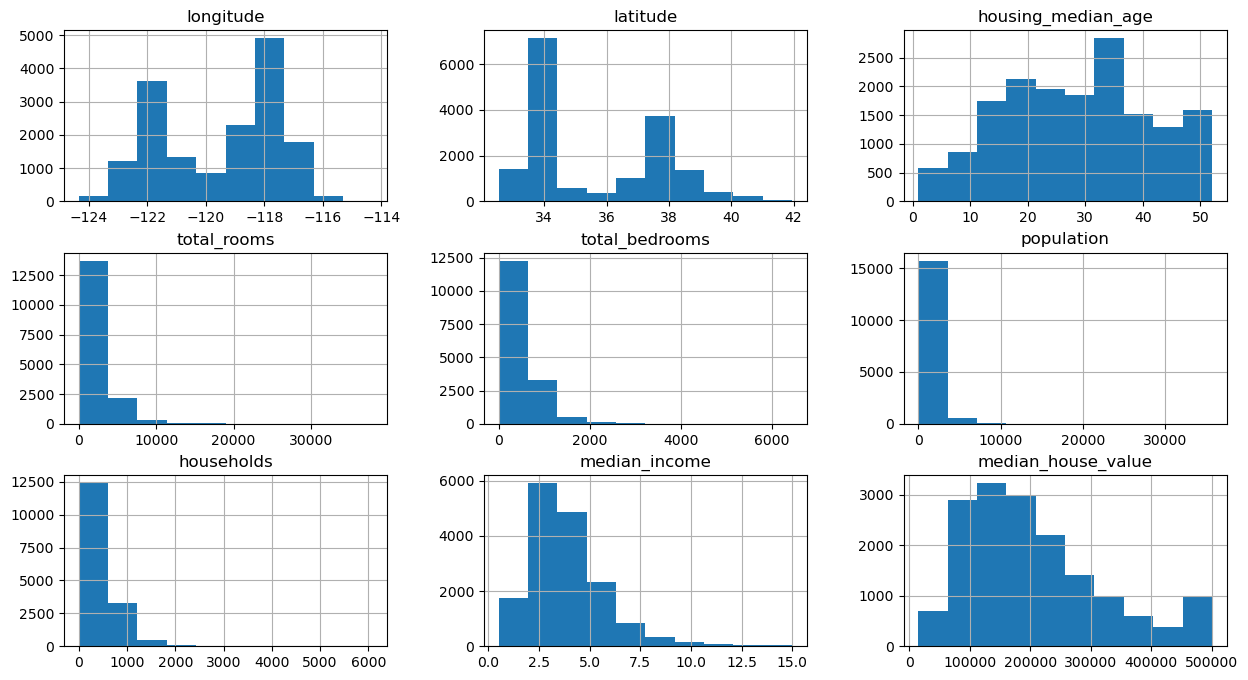

In [13]:
train_data.hist(figsize=(15, 8))

#### Heatmap for a correlation matrix

In [14]:
train_data.corr()

C:\Users\ndlov\AppData\Local\Temp\ipykernel_1276\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925228,-0.109571,0.041827,0.062636,0.096338,0.049986,-0.006677,-0.039388
latitude,-0.925228,1.000000,0.011760,-0.034731,-0.062311,-0.105964,-0.067313,-0.088189,-0.149713
housing_median_age,-0.109571,0.011760,1.000000,-0.364318,-0.322472,-0.296705,-0.303968,-0.114288,0.110600
total_rooms,0.041827,-0.034731,-0.364318,1.000000,0.930745,0.858141,0.919316,0.196812,0.133347
total_bedrooms,0.062636,-0.062311,-0.322472,0.930745,1.000000,0.878309,0.980563,-0.007405,0.051166
population,0.096338,-0.105964,-0.296705,0.858141,0.878309,1.000000,0.906627,0.003105,-0.025215
households,0.049986,-0.067313,-0.303968,0.919316,0.980563,0.906627,1.000000,0.012491,0.065567
median_income,-0.006677,-0.088189,-0.114288,0.196812,-0.007405,0.003105,0.012491,1.000000,0.688260
median_house_value,-0.039388,-0.149713,0.110600,0.133347,0.051166,-0.025215,0.065567,0.688260,1.000000


C:\Users\ndlov\AppData\Local\Temp\ipykernel_1276\1504904684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Figure size 1500x800 with 0 Axes>

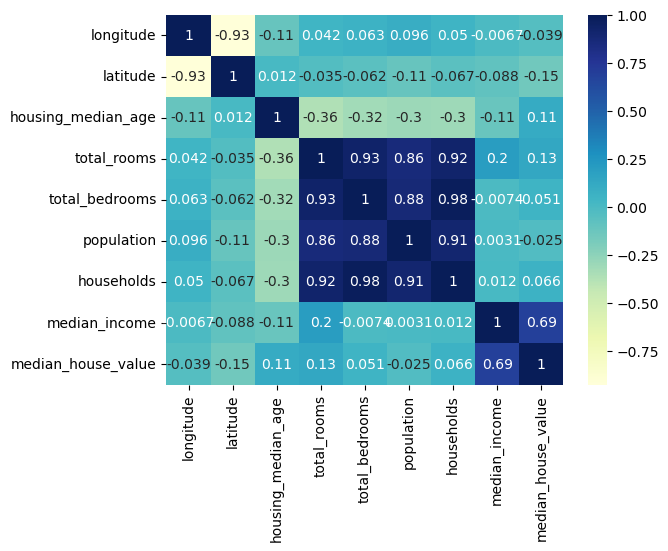

<Figure size 1500x800 with 0 Axes>

In [15]:
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.figure(figsize=(15,8))

## Data PreProcessing

#### Address skewness in the distribution

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

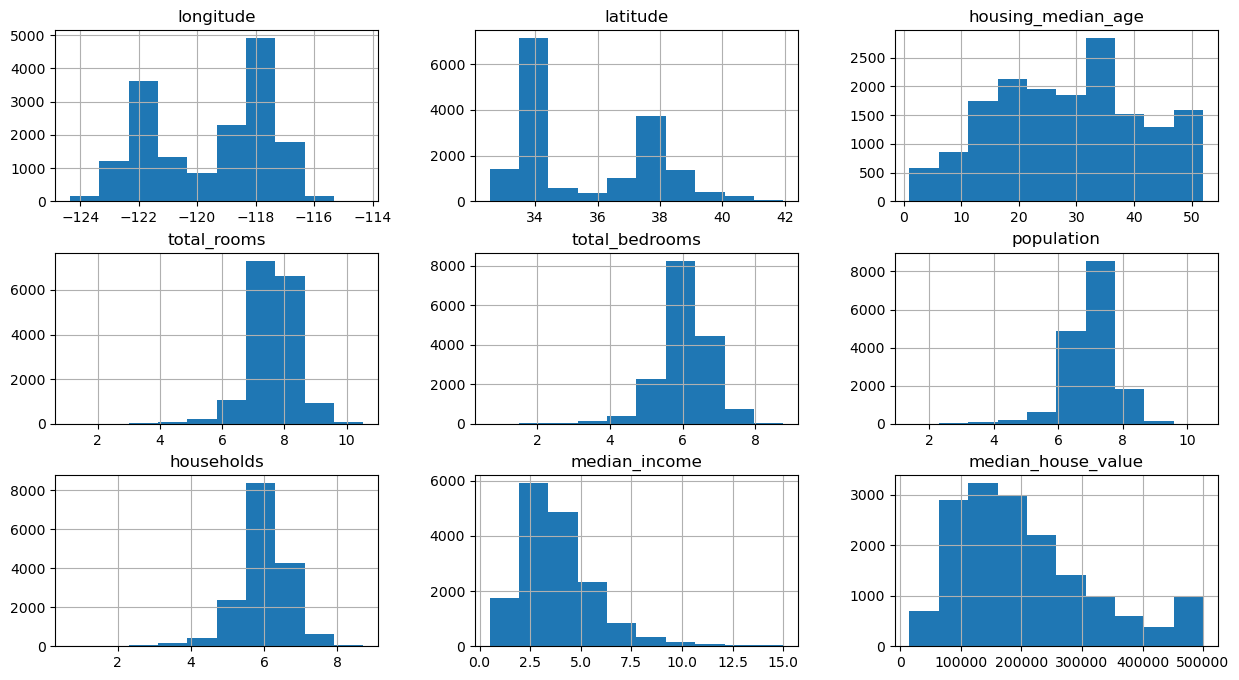

In [17]:
train_data.hist(figsize=(15, 8))

#### Change the ocean proximity column into a categorical value

In [18]:
train_data.ocean_proximity.value_counts() # all possible values of ocean proximity

<1H OCEAN     7208
INLAND        5207
NEAR OCEAN    2099
NEAR BAY      1828
ISLAND           4
Name: ocean_proximity, dtype: int64

In [19]:
pd.get_dummies(train_data.ocean_proximity) # create a new feature for each value 

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1018,0,1,0,0,0
3345,0,1,0,0,0
19112,1,0,0,0,0
14827,0,0,0,0,1
18902,0,0,0,1,0
...,...,...,...,...,...
3963,1,0,0,0,0
7390,1,0,0,0,0
15746,0,0,0,1,0
8422,1,0,0,0,0


In [20]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)) # join with train_data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1018,-121.79,37.67,26.0,7.679714,5.828946,6.854355,5.849325,6.0797,INLAND,211000.0,0,1,0,0,0
3345,-121.11,41.07,26.0,7.443078,5.733341,6.635947,5.525453,2.7188,INLAND,48100.0,0,1,0,0,0
19112,-122.63,38.22,34.0,6.778785,5.081404,5.921578,5.123964,4.0417,<1H OCEAN,232100.0,1,0,0,0,0
14827,-117.09,32.66,37.0,7.117206,5.802118,6.991177,5.802118,1.6389,NEAR OCEAN,114300.0,0,0,0,0,1
18902,-122.26,38.11,52.0,7.853216,6.461468,7.122060,6.272877,2.6708,NEAR BAY,109700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,-118.57,34.20,18.0,8.875986,7.533694,8.443116,7.438384,3.1818,<1H OCEAN,208000.0,1,0,0,0,0
7390,-118.24,33.96,34.0,7.452982,6.070738,7.537430,6.033086,2.1078,<1H OCEAN,100600.0,1,0,0,0,0
15746,-122.43,37.77,52.0,8.280204,6.978214,7.556951,6.881411,2.9567,NEAR BAY,425000.0,0,0,0,1,0
8422,-118.35,33.93,31.0,7.918265,6.548219,7.587817,6.395262,3.5139,<1H OCEAN,192800.0,1,0,0,0,0


In [21]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) 
train_data
# drop the ocean_proximity column and save into the train data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1018,-121.79,37.67,26.0,7.679714,5.828946,6.854355,5.849325,6.0797,211000.0,0,1,0,0,0
3345,-121.11,41.07,26.0,7.443078,5.733341,6.635947,5.525453,2.7188,48100.0,0,1,0,0,0
19112,-122.63,38.22,34.0,6.778785,5.081404,5.921578,5.123964,4.0417,232100.0,1,0,0,0,0
14827,-117.09,32.66,37.0,7.117206,5.802118,6.991177,5.802118,1.6389,114300.0,0,0,0,0,1
18902,-122.26,38.11,52.0,7.853216,6.461468,7.122060,6.272877,2.6708,109700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,-118.57,34.20,18.0,8.875986,7.533694,8.443116,7.438384,3.1818,208000.0,1,0,0,0,0
7390,-118.24,33.96,34.0,7.452982,6.070738,7.537430,6.033086,2.1078,100600.0,1,0,0,0,0
15746,-122.43,37.77,52.0,8.280204,6.978214,7.556951,6.881411,2.9567,425000.0,0,0,0,1,0
8422,-118.35,33.93,31.0,7.918265,6.548219,7.587817,6.395262,3.5139,192800.0,1,0,0,0,0


#### Assess correlation on updated training data

<Axes: >

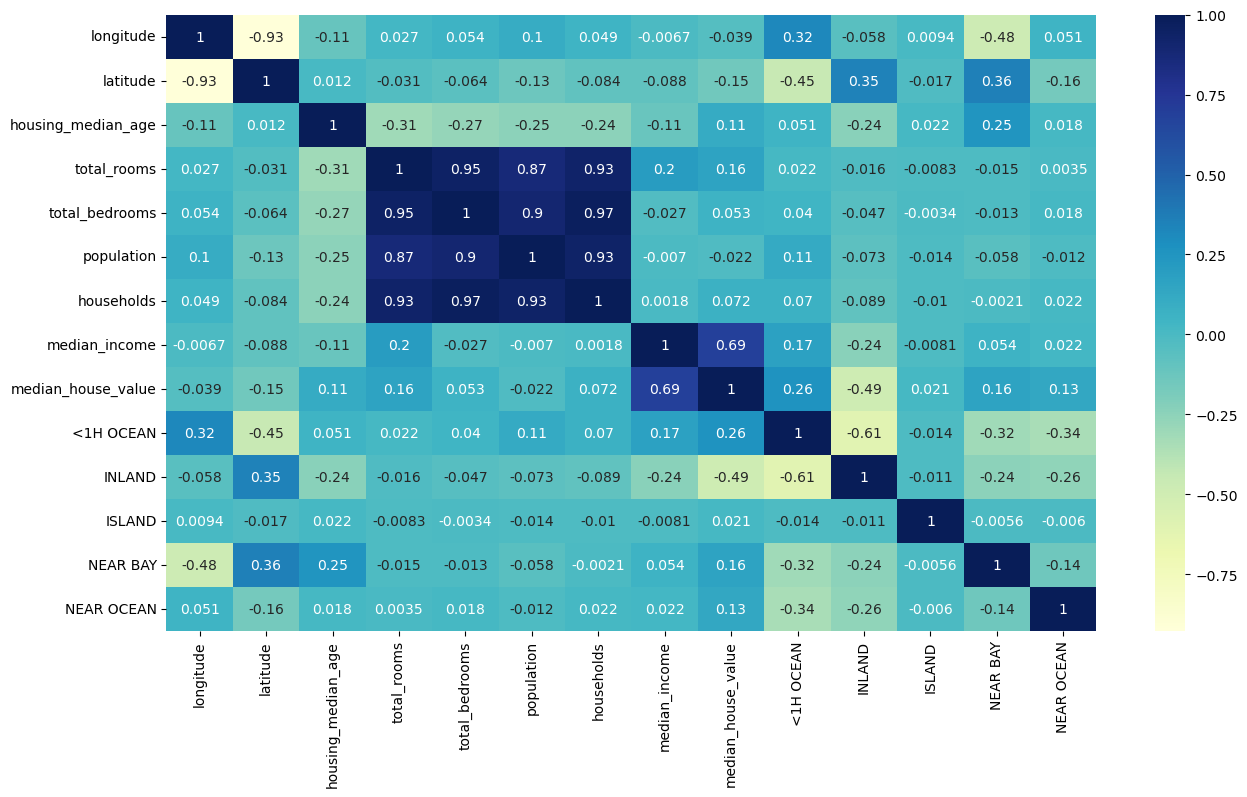

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#### The median income significantly influences the median house value, exhibiting a correlation coefficient of 0.69. This indicates that as the median income in a particular block rises, so does the price of houses within that block. Moreover, the location of the house inland appears to have minimal impact on its value in this scenario.

#### Plot the coordinates

<Axes: xlabel='latitude', ylabel='longitude'>

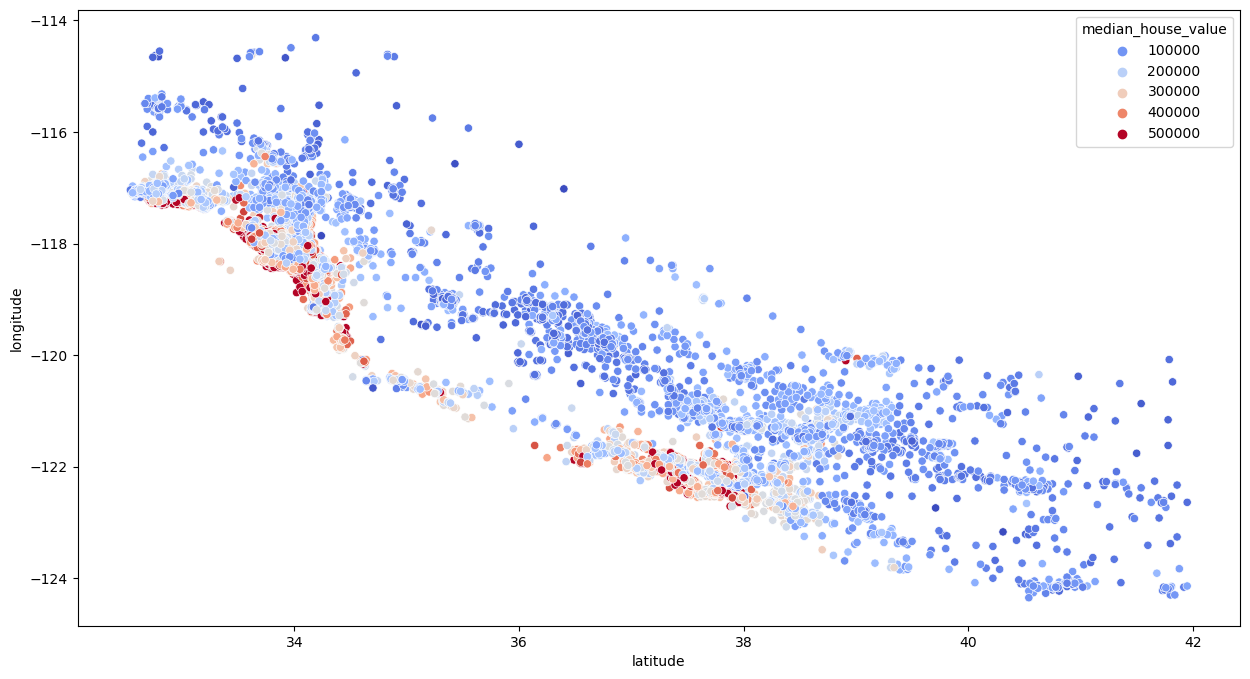

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

#### The median house value is high for houses closer to water than those inland as indicated by the graph above

## Feature Engineering 

In [26]:
# We have total_rooms and total_bedrooms, we can find the number of bedrooms per room -- how many rooms from the
#total_rooms are bedrooms

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

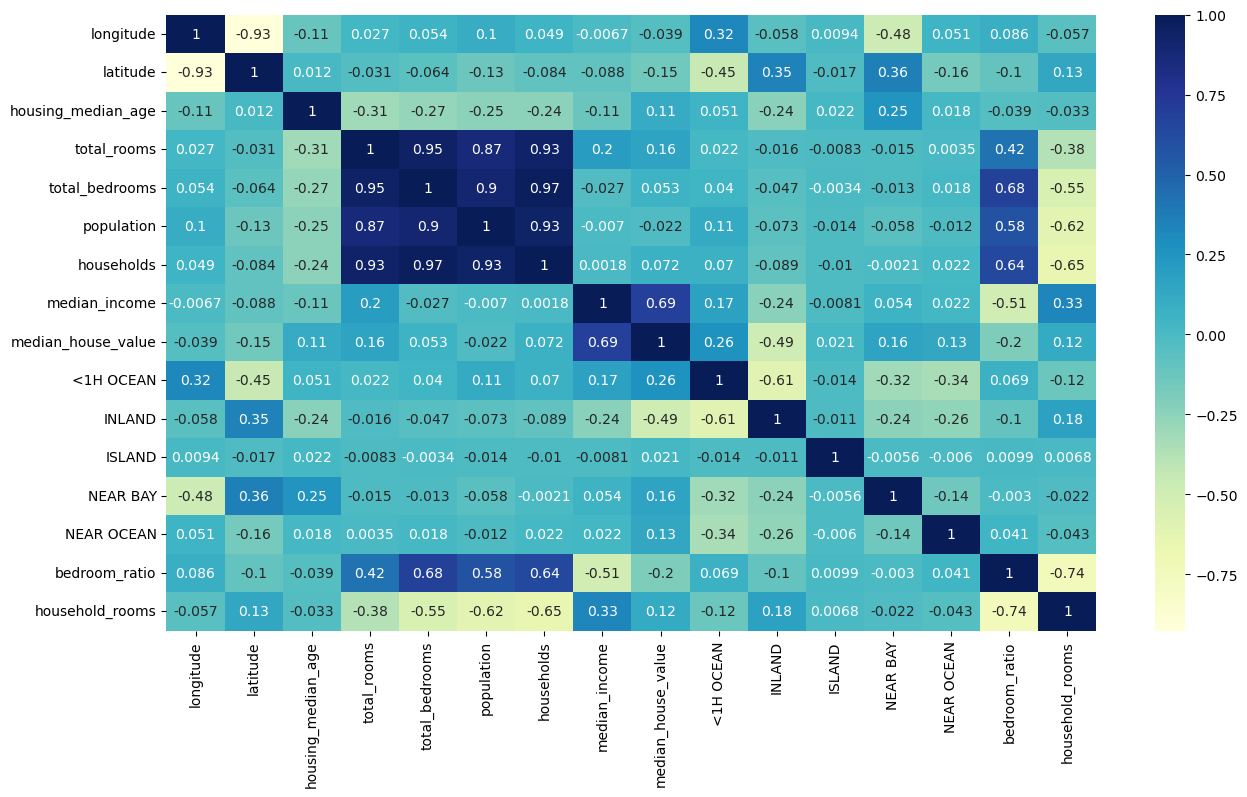

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#### The correlation between population and total rooms is notably strong at 0.87, indicating that as the population increases, there's a corresponding need for more rooms to accommodate them within the house.

## Training the model

#### Linear Model

In [29]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

#### Fit the data into the test data

In [30]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) 

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [31]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12892,-121.33,38.66,15.0,8.382976,6.812345,7.519150,6.708084,2.7797,105500.0,0,1,0,0,0,0.812640,1.249683
12688,-121.44,38.60,16.0,8.002360,6.762730,7.123673,6.628041,2.8231,137500.0,0,1,0,0,0,0.845092,1.207349
19436,-121.00,37.69,18.0,8.151910,6.495266,7.281386,6.444131,3.4079,147500.0,0,1,0,0,0,0.796778,1.265013
2192,-119.95,36.80,30.0,7.118016,5.370638,6.431331,5.298317,3.4297,112500.0,0,1,0,0,0,0.754513,1.343448
8792,-118.45,33.80,31.0,8.477204,6.356108,7.307202,6.359574,11.9993,500001.0,0,0,0,0,1,0.749788,1.332983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301,-118.13,33.76,46.0,7.949797,6.513230,7.069874,6.508769,4.7875,363800.0,0,0,0,0,1,0.819295,1.221398
6779,-118.15,34.11,39.0,7.870548,6.368187,7.181592,6.278521,3.5875,309300.0,1,0,0,0,0,0.809116,1.253567
11958,-117.40,33.90,32.0,7.142037,5.187386,6.232448,5.198497,3.6667,314100.0,0,1,0,0,0,0.726317,1.373866
10913,-117.86,33.73,26.0,7.440147,6.124683,7.929126,6.139885,2.6385,180200.0,1,0,0,0,0,0.823194,1.211773


In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1018,-121.79,37.67,26.0,7.679714,5.828946,6.854355,5.849325,6.0797,211000.0,0,1,0,0,0,0.759006,1.312923
3345,-121.11,41.07,26.0,7.443078,5.733341,6.635947,5.525453,2.7188,48100.0,0,1,0,0,0,0.770292,1.347053
19112,-122.63,38.22,34.0,6.778785,5.081404,5.921578,5.123964,4.0417,232100.0,1,0,0,0,0,0.749604,1.322957
14827,-117.09,32.66,37.0,7.117206,5.802118,6.991177,5.802118,1.6389,114300.0,0,0,0,0,1,0.815224,1.226656
18902,-122.26,38.11,52.0,7.853216,6.461468,7.122060,6.272877,2.6708,109700.0,0,0,0,1,0,0.822780,1.251932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,-118.57,34.20,18.0,8.875986,7.533694,8.443116,7.438384,3.1818,208000.0,1,0,0,0,0,0.848773,1.193268
7390,-118.24,33.96,34.0,7.452982,6.070738,7.537430,6.033086,2.1078,100600.0,1,0,0,0,0,0.814538,1.235352
15746,-122.43,37.77,52.0,8.280204,6.978214,7.556951,6.881411,2.9567,425000.0,0,0,0,1,0,0.842759,1.203271
8422,-118.35,33.93,31.0,7.918265,6.548219,7.587817,6.395262,3.5139,192800.0,1,0,0,0,0,0.826977,1.238146


In [33]:
# Note the Island column has a lot of zero instances

In [34]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [35]:
reg.score(x_test, y_test) 

0.6723816027429325

#### Only 67% of the data is explained by the regression model. This leaves room to explore other techniques to find the optimal model.

### Finding the optimal model 

#### Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
forest.score(x_test, y_test)

0.8097082046460027

#### In this Random forest model 80% of the data is explained, which is an improvement from the regression model.

#### Cross Validation 

In [38]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=8, n_estimators=30)

In [40]:
best_forest.score(x_test, y_test)

0.8101728403939752

#### After cross validating the model, it improved to 81% making the Random Forest Model the optimal solution to predict the house prices in Califonia in this scenario.